Wellcome data:
https://www.dropbox.com/s/pl5kcrhs2lyj90m/WELLCOME.zip?dl=0

#### Determine the five most common journals and the total articles for each.
#### Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal. 
You will need to do considerable data cleaning in order to extract accurate estimates, and may want to look into data encoding methods if you get stuck.
<br><br>
For a real bonus round, <b>identify the open access prices paid by subject area.</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
spend = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding = "ISO-8859-1")

In [4]:
spend

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in subjects at ultra-high risk for psychosis,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-negative bacterial surface using lipopolysaccharides from rough strains of escherichia coli,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related opioids with irreversible ? opioid receptor antagonist effects.",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor agonist activity.,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoesters: mechanism and synthetic utility.,£685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies of 4-(Thiazol-5-yl)-2-(phenylamino) pyrimidine-5-carbonitrile CDK9 inhibitors suggest the basis for Isotype Slectivity,£2392.20
6,PMC3709265,ACS,Journal of Proteome Research,"Mapping Proteolytic Processing in the Secretome of Gastric Cancer-Associated Myofibroblasts Reveals Activation of MMP-1, MMP-2, and MMP?3",£2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene by self-assembled siRNA lipoplexes of LinOS and cholesterol.,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Diphosphate N-Acetylglucosamine Pyrophosphorylase from Trypanosoma brucei.,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugability of the kinome of Trypanosoma brucei.,£1294.78


In [5]:
# spend['id'] = spend['PMID/PMCID'].apply(lambda x: ''.join(list(filter(str.isdigit, str(x)))))
# this returns multiple integers together as one long integer, which is a probelm.
# Maybe not necessary to figure out for this challenge, but I do want to pursue.

In [6]:
spend['Journal title'].value_counts()
# We need to make the text uniform because the capital letters are counted as a separate title
# than lower case of the same title

PLoS One                                                               92
PLoS ONE                                                               62
Journal of Biological Chemistry                                        48
Nucleic Acids Research                                                 21
Proceedings of the National Academy of Sciences                        19
Human Molecular Genetics                                               18
PLoS Neglected Tropical Diseases                                       18
Nature Communications                                                  17
Neuroimage                                                             15
PLoS Genetics                                                          15
PLoS Pathogens                                                         15
BMC Public Health                                                      14
PLOS ONE                                                               14
Brain                                 

In [7]:
spend['journal'] = spend['Journal title'].apply(str)
# Forces all entries to be identified as strings

In [8]:
spend['journal'] = spend['journal'].apply(str.lower)
# Makes all entries lower case

In [9]:
spend['journal'] = spend['journal'].str.strip()
# Strips whitespace

In [10]:
sorted(spend['journal'])
# check for whitespace at ends

['academy of nutrition and dietetics',
 'acs chemical biology',
 'acs chemical biology',
 'acs chemical biology',
 'acs chemical biology',
 'acs chemical biology',
 'acs chemical neuroscience',
 'acs nano',
 'acs nano',
 'acta crystallographica section d,  biological crystallography',
 'acta crystallographica section d: biological crystallography',
 'acta crystallographica section f: structural biology and crystallization communications',
 'acta crystallographica section f: structural biology and crystallization communications',
 'acta crystallographica, section d',
 'acta crystallography d',
 'acta d',
 'acta dermato venereologica',
 'acta diabetologica',
 'acta f',
 'acta neuropathol',
 'acta neuropathologica',
 'acta neuropathologica',
 'acta neuropathologica',
 'acta opthalmologica',
 'acta physiol',
 'addiction',
 'addiction',
 'advances in experimental medicine and biology',
 'advances in experimental medicine and biology',
 'advances in experimental medicine and biology',
 'adva

In [11]:
spend['journal'].value_counts()

plos one                                                         190
journal of biological chemistry                                  53 
neuroimage                                                       29 
nucleic acids research                                           26 
plos pathogens                                                   24 
plos genetics                                                    24 
proceedings of the national academy of sciences                  22 
plos neglected tropical diseases                                 20 
nature communications                                            19 
human molecular genetics                                         19 
movement disorders                                               15 
brain                                                            14 
bmc public health                                                14 
journal of neuroscience                                          13 
biochemical journal               

In [12]:
# There are still 895 distinct entries (down from 929 pre-whitespace-strip)
# I don't think I want to go through and match each misspelling, editing one line at a time,
# but it looks like there may be value in changing all instances of '&' into 'and'.

In [13]:
spend['journal'] = spend['journal'].str.replace('&', 'and')

In [14]:
sorted(spend['journal'])
# notice 'health & place' no longer exists, 'and' successfully substituted for '&'

['academy of nutrition and dietetics',
 'acs chemical biology',
 'acs chemical biology',
 'acs chemical biology',
 'acs chemical biology',
 'acs chemical biology',
 'acs chemical neuroscience',
 'acs nano',
 'acs nano',
 'acta crystallographica section d,  biological crystallography',
 'acta crystallographica section d: biological crystallography',
 'acta crystallographica section f: structural biology and crystallization communications',
 'acta crystallographica section f: structural biology and crystallization communications',
 'acta crystallographica, section d',
 'acta crystallography d',
 'acta d',
 'acta dermato venereologica',
 'acta diabetologica',
 'acta f',
 'acta neuropathol',
 'acta neuropathologica',
 'acta neuropathologica',
 'acta neuropathologica',
 'acta opthalmologica',
 'acta physiol',
 'addiction',
 'addiction',
 'advances in experimental medicine and biology',
 'advances in experimental medicine and biology',
 'advances in experimental medicine and biology',
 'adva

In [15]:
spend['journal'].value_counts()

plos one                                                         190
journal of biological chemistry                                  53 
neuroimage                                                       29 
nucleic acids research                                           26 
plos genetics                                                    24 
plos pathogens                                                   24 
proceedings of the national academy of sciences                  22 
plos neglected tropical diseases                                 20 
human molecular genetics                                         19 
nature communications                                            19 
movement disorders                                               15 
brain                                                            14 
bmc public health                                                14 
journal of neuroscience                                          13 
biochemical journal               

In [16]:
# There are now 882 distinct entries (down from 895 pre-&-removal)

#### The five most common journals and the total articles for each:

In [17]:
spend['journal'].value_counts().head(5)
# This fulfills the first task, unless the "plos" subtitles need to be combined.
# Each article is posted once, with only one posted twice, so we take these counts as idividual articles

plos one                           190
journal of biological chemistry    53 
neuroimage                         29 
nucleic acids research             26 
plos genetics                      24 
Name: journal, dtype: int64

<i>Let's remove all but these entries in the top 5 for easier processing.<i>

In [18]:
# Break away each top journal, then add them all together
spend_plos = spend[spend.journal == 'plos one']

In [19]:
spend_journal = spend[spend.journal == 'journal of biological chemistry']

In [20]:
spend_neuro = spend[spend.journal == 'neuroimage']

In [21]:
spend_nucleic = spend[spend.journal == 'nucleic acids research']

In [22]:
spend_path = spend[spend.journal == 'plos pathogens']

In [23]:
# Now that we have taken the sections out by top five journal names, we append them, starting with a new name,
# spend_mini, adding the plos and journal data frames

In [24]:
spend_mini = spend_plos.append(spend_journal, ignore_index=False, verify_integrity=False)

In [25]:
# Appending neuro to spend_mini

In [26]:
spend_mini = spend_mini.append(spend_neuro, ignore_index=False, verify_integrity=False)

In [27]:
# Appending nucleic to spend_mini

In [28]:
spend_mini = spend_mini.append(spend_nucleic, ignore_index=False, verify_integrity=False)

In [29]:
# Appending pathogen to spend_mini

In [30]:
spend_mini = spend_mini.append(spend_path, ignore_index=False, verify_integrity=False)

In [31]:
spend_mini['cost'] = spend_mini['COST (£) charged to Wellcome (inc VAT when charged)']

In [32]:
spend_mini = spend_mini[['PMID/PMCID',
                         'Publisher',
                         'journal',
                         'Article title',
                         'cost']]

In [33]:
spend_mini['cost'] = spend_mini['cost'].str.strip()  
# Strips whitespace from string

In [47]:
spend_mini.head(10)

,PMID/PMCID,Publisher,journal,Article title,cost
1282,3517619,PLoS,plos one,"HCN1 and HCN2 in Rat DRG Neurons: Levels in Nociceptors and Non-Nociceptors, NT3-Dependence and Influence of CFA-Induced Skin Inflammation on HCN2 and NT3 Expression",1001.03
1283,3498109,PLoS,plos one,Fetal alcohol exposure and IQ at age 8: Evidence from a population-based birth-cohort study,1004.15
1284,3515553,PLoS,plos one,Vitamin B-12 status during pregnancy and childs IQ at age 8: A Mendelian randomization study in the Avon Longitudinal Study of Parents and Children,1011.45
1285,3522679,PLoS,plos one,Validation of Dual Energy X-ray Absorptiometry measures of abdominal fat by comparison with magnetic resonance imaging in an Indian population,1011.45
1286,3485223,PLoS,plos one,Associations of different phenotypes of wheezing illness in early childhood with environmental variables implicated in the aetiology of asthma,1015.73
1287,PMC3547059,PLoS,plos one,"""Involvement of EphB1 receptors signalling in models of inflammatory and neuropathic pain"" PONE-D-12-21867",1023.41
1288,3573029,PLoS,plos one,Reactive oxygen species modulate the barrier function of the human glomerular endothelial glycocalyx,1039.87
1289,3769269,PLoS,plos one,Chronic pravastatin but not atorvastatin treatment impairs cognitive function in two rodent models of learning and memory,1061.24
1290,3782430,PLoS,plos one,Expression of HIV-1 Vpu Leads to Loss of the Viral Restriction Factor CD317/Tetherin from Lipid Rafts and its Enhanced Lysosomal Degradation,1061.24
1291,3797097,PLoS,plos one,"Molecular phylogeny of a RING E3 ubiquitin ligase, conserved in eukaryotic cells and dominated by homologous components, the muskelin/RanBPM/CTLH complex",1061.24


#### spend_mini is now all set with the data we want of the top 5 journals!

In [35]:
grid = sns.FacetGrid(spend_mini, row="journal", col="cost", margin_titles=True)
grid.map(plt.hist, "journal", bins=np.linspace(0, 40, 15));

In [36]:
spend_mini['cost'] = spend_mini['cost'].replace({'\£':''}, regex = True)
#removing the £ sign so the data can be registered as a float and not an object/string

In [37]:
spend_mini['cost'] = spend_mini['cost'].replace({'\$':''}, regex = True)
#there were some random $ signs thrown in for some reasn, butnot in front of any cost numbers!

In [38]:
spend_mini['cost'] = spend_mini['cost'].apply(lambda x: float(x))

In [51]:
spend_mini['cost'].head()

1282    1001.03
1283    1004.15
1284    1011.45
1285    1011.45
1286    1015.73
Name: cost, dtype: float64

In [40]:
spend_mini.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 1282 to 1604
Data columns (total 5 columns):
PMID/PMCID       317 non-null object
Publisher        322 non-null object
journal          322 non-null object
Article title    322 non-null object
cost             322 non-null float64
dtypes: float64(1), object(4)
memory usage: 25.1+ KB


In [41]:
spend_mini.groupby(['journal']).mean()

,cost
journal,
journal of biological chemistry,20264.633962
neuroimage,2215.168276
nucleic acids research,1149.000000
plos one,38751.291368
plos pathogens,84775.044583


In [42]:
spend_mini.groupby(['journal']).median()

,cost
journal,
journal of biological chemistry,1314.530
neuroimage,2326.430
nucleic acids research,852.000
plos one,898.475
plos pathogens,1600.520


In [43]:
spend_mini.groupby(['journal']).std()

,cost
journal,
journal of biological chemistry,137165.488398
neuroimage,266.653947
nucleic acids research,442.940447
plos one,189009.511974
plos pathogens,281885.544090


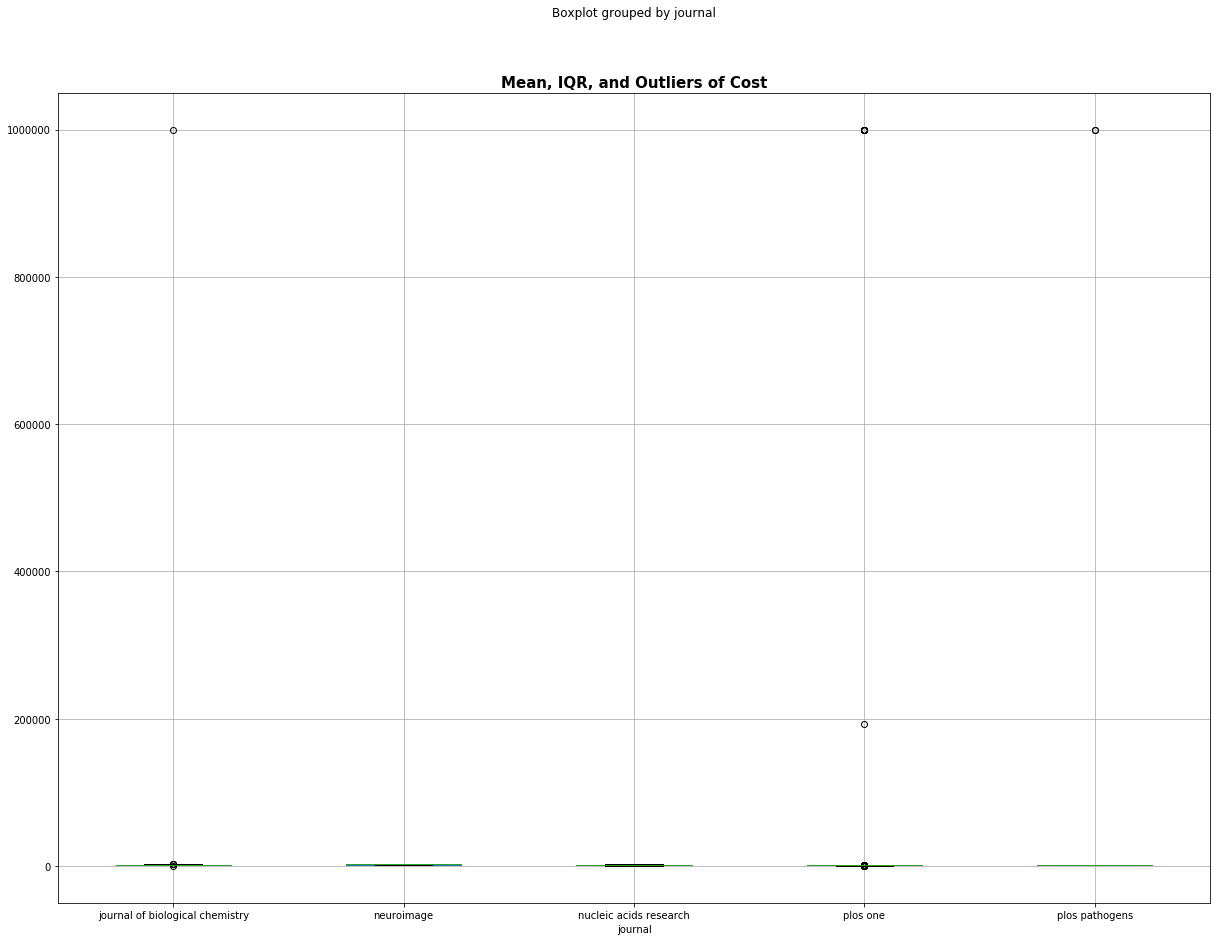

In [44]:
fig, ax = plt.subplots(figsize=(20,15))
spend_mini.boxplot(column=['cost'], by='journal', ax=ax)
plt.title('Mean, IQR, and Outliers of Cost', fontdict={'fontsize': 15, 'weight':'bold'});

Let's remove the outliers above cost 20,000.

In [45]:
mini_20k = spend_mini[spend_mini.cost <= 20000 ]

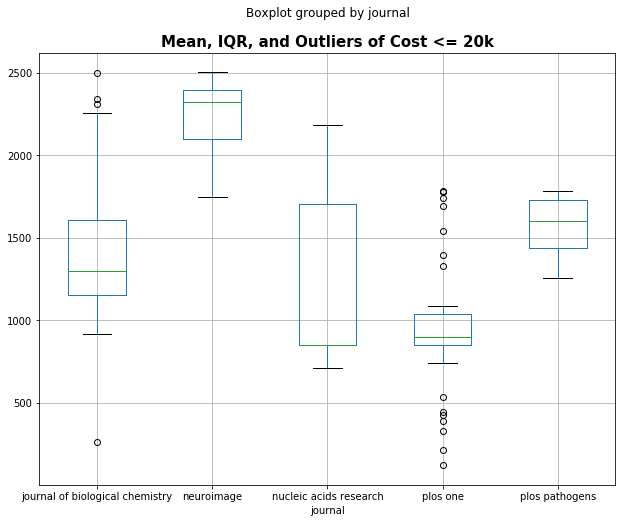

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
mini_20k.boxplot(column=['cost'], by='journal', ax=ax)
plt.title('Mean, IQR, and Outliers of Cost <= 20k', fontdict={'fontsize': 15, 'weight':'bold'});